<a href="https://colab.research.google.com/github/Manojpatil123/Chat-with-Video-using-Qwen2-VL/blob/main/Copy_of_jina_embeddings_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install huggingface_hub

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()

# Load jina-embeddings-v4

In [ ]:
# !pip install transformers>=4.52.0 torch>=2.6.0 peft>=0.15.2 torchvision pillow
from transformers import AutoModel
from huggingface_hub import get_full_repo_name
import os

# Get the repository name
repo_id = "jinaai/jina-embeddings-v4"

# Get the Hugging Face token from the environment or a secure source
# Make sure you have logged in using notebook_login() or set the HF_TOKEN environment variable
hf_token = "YOUR-HF-TOKEN"

# Initialize the model
model = AutoModel.from_pretrained(repo_id, trust_remote_code=True, token=hf_token)

model.to("cuda")

config.json: 0.00B [00:00, ?B/s]

configuration_jina_embeddings_v4.py:   0%|          | 0.00/687 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- configuration_jina_embeddings_v4.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_jina_embeddings_v4.py: 0.00B [00:00, ?B/s]

qwen2_5_vl.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- qwen2_5_vl.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


custom_lora_module.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- custom_lora_module.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v4:
- modeling_jina_embeddings_v4.py
- qwen2_5_vl.py
- custom_lora_module.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


chat_template.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/360M [00:00<?, ?B/s]

PeftModelForFeatureExtraction(
  (base_model): LoraModel(
    (model): JinaEmbeddingsV4Model(
      (model): Qwen2_5_VLModel(
        (visual): Qwen2_5_VisionTransformerPretrainedModel(
          (patch_embed): Qwen2_5_VisionPatchEmbed(
            (proj): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
          )
          (rotary_pos_emb): Qwen2_5_VisionRotaryEmbedding()
          (blocks): ModuleList(
            (0-31): 32 x Qwen2_5_VLVisionBlock(
              (norm1): Qwen2RMSNorm((1280,), eps=1e-06)
              (norm2): Qwen2RMSNorm((1280,), eps=1e-06)
              (attn): Qwen2_5_VLVisionSdpaAttention(
                (qkv): Linear(in_features=1280, out_features=3840, bias=True)
                (proj): Linear(in_features=1280, out_features=1280, bias=True)
              )
              (mlp): Qwen2_5_VLMLP(
                (gate_proj): Linear(in_features=1280, out_features=3420, bias=True)
                (up_proj): Linear(in_features=1280, out_feat

# Get Text & Image Embeddings for Retrieval

In [ ]:
import numpy as np
from transformers import AutoModel
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


# Multilingual sci-fi quotes (e.g., "May the Force be with you")
texts = [
    "May the Force be with you",  # English
    "Que la Fuerza te acompañe",  # Spanish
    "フォースと共にあらんことを",  # Japanese
    "Que a Força esteja com você",  # Portuguese
    "Möge die Macht mit dir sein",  # German
    "دع القوة تكون معك",  # Arabic
]

# Images of sci-fi movie scenes
image_urls = [
    "https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg",  # Star Wars lightsaber duel
    "https://i.ibb.co/B2bNB4Sd/matrix-code.jpg",  # Matrix code rain
    "https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg",  # Blade Runner cityscape
]


In [ ]:

# Encode text for retrieval
text_embeddings = model.encode_text(
    texts=texts,
    task="retrieval",
    prompt_name="query",
    return_numpy=True
)

# Encode images for retrieval
image_embeddings = model.encode_image(
    images=image_urls,
    task="retrieval",
    return_numpy=True
)


Encoding images...: 100%|██████████| 1/1 [00:14<00:00, 14.05s/it]


Similarity Scores (Text vs. Images):

Quote: May the Force be with you
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.5862
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.4432
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.4057

Quote: Que la Fuerza te acompañe
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.3293
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.2927
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.2795

Quote: フォースと共にあらんことを
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.3473
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.2652
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.2692

Quote: Que a Força esteja com você
  Image 1 (https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg): 0.3998
  Image 2 (https://i.ibb.co/B2bNB4Sd/matrix-code.jpg): 0.3309
  Image 3 (https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg): 0.3337

Quote: Möge die Macht mit dir sein
  Ima

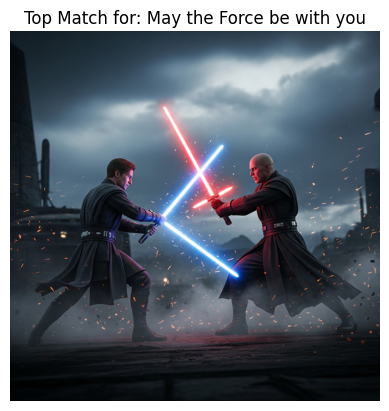

In [ ]:

# Compute cosine similarity between text and image embeddings
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

similarities = cosine_similarity(text_embeddings, image_embeddings)

# Display results
print("Similarity Scores (Text vs. Images):")
for i, text in enumerate(texts):
    print(f"\nQuote: {text}")
    for j, url in enumerate(image_urls):
        print(f"  Image {j+1} ({url}): {similarities[i][j]:.4f}")

# Visualize top match for first quote
top_image_idx = np.argmax(similarities[0])
response = requests.get(image_urls[top_image_idx])
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.title(f"Top Match for: {texts[0]}")
plt.axis("off")
plt.show()

# Get Text Embeddings for Text Matching

In [ ]:
!pip install scikit-learn matplotlib numpy

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# --- A Curated Multimodal, Multilingual Dataset ---
data = {
    "Cosmic Exploration": {
        "texts": ["Nebulae and distant galaxies", "L'exploration spatiale", "星际探索", "Viaje a las estrellas"],
        "images": ["https://i.ibb.co/B5ZNstC9/galaxy.jpg", "https://i.ibb.co/WNBkxR2v/astronaut.jpg"]
    },
    "Deep Sea Biology": {
        "texts": ["Bioluminescent creatures of the deep", "La vida en las fosas abisales", "深海生物", "Tiefseeforschung"],
        "images": ["https://i.ibb.co/LzvH2YKg/jellyfish.jpg", "https://i.ibb.co/yFxk6MrN/anglerfish.jpg"]
    },
    "Architectural Marvels": {
        "texts": ["Modernist architecture", "Готическая архитектура", "未来派の建物", "Ancient Roman structures"],
        "images": ["https://i.ibb.co/zTsKJKLH/modern-architecture.jpg", "https://i.ibb.co/Zp95cW2c/gothic-cathedral.jpg"]
    }
}

# --- Prepare for Embedding ---
all_texts = []
all_images = []
labels = []
for concept, content in data.items():
    all_texts.extend(content["texts"])
    all_images.extend(content["images"])
    labels.extend([concept] * (len(content["texts"]) + len(content["images"])))

# --- Get the Embeddings ---
text_embeddings = model.encode_text(texts=all_texts, task="retrieval", return_numpy=True)
image_embeddings = model.encode_image(images=all_images, task="retrieval", return_numpy=True)

# --- Combine and Reduce Dimensionality ---
all_embeddings = np.concatenate([text_embeddings, image_embeddings])
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# --- The "Geeky" Visualization ---
plt.figure(figsize=(12, 8))
num_texts = len(all_texts)
colors = {'Cosmic Exploration': 'r', 'Deep Sea Biology': 'b', 'Architectural Marvels': 'g'}

# Plot texts as 'x' and images as 'o'
for i, (embedding, label) in enumerate(zip(reduced_embeddings, labels)):
    marker = 'x' if i < num_texts else 'o'
    plt.scatter(embedding[0], embedding[1], c=colors[label], marker=marker, label=label if i == 0 or labels[i-1] != label else "")

# Create a legend
handles = [plt.Line2D([0], [0], marker='s', color='w', label=concept, markerfacecolor=color, markersize=10) for concept, color in colors.items()]
plt.legend(handles=handles, title="Concepts")
plt.title("2D t-SNE projection of Multimodal, Multilingual Embeddings")
plt.show()

Encoding images...:   0%|          | 0/1 [00:01<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 9.61 GiB. GPU 0 has a total capacity of 14.74 GiB of which 3.47 GiB is free. Process 2758 has 11.27 GiB memory in use. Of the allocated memory 8.94 GiB is allocated by PyTorch, and 2.20 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
texts = [
    "غروب جميل على الشاطئ",  # Arabic
    "海滩上美丽的日落",  # Chinese
    "Un beau coucher de soleil sur la plage",  # French
    "Ein wunderschöner Sonnenuntergang am Strand",  # German
    "Ένα όμορφο ηλιοβασίλεμα πάνω από την παραλία",  # Greek
    "समुद्र तट पर एक खूबसूरत सूर्यास्त",  # Hindi
    "Un bellissimo tramonto sulla spiaggia",  # Italian
    "浜辺に沈む美しい夕日",  # Japanese
    "해변 위로 아름다운 일몰",  # Korean
]

text_embeddings = model.encode_text(texts=texts, task="text-matching")

# Get Text Embeddings for Codes Retrieval

In [ ]:
code_snippets = [
    """
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    """,
    """
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    """,
    """
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    """
]

# --- Multilingual "Developer" Queries ---
dev_queries = [
    "une fonction pour sauvegarder des données dans un fichier json", # French: a function to save data to a json file
    "計算フィボナッチ数列の関数", # Japanese: function to calculate the Fibonacci sequence
    "функция для вычисления средней абсолютной ошибки", # Russian: function to calculate mean absolute error
    "eine Funktion, die eine Sequenz von Fibonacci-Zahlen erzeugt" # German: a function that generates a sequence of Fibonacci numbers
]


# Here, we treat code as text, but the principle is the same.
code_embeddings = model.encode_text(texts=code_snippets, task="retrieval", return_numpy=True)
query_embeddings = model.encode_text(texts=dev_queries, task="retrieval", prompt_name="query", return_numpy=True)

# Compute cosine similarity between text and image embeddings
def cosine_similarity(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.dot(a, b.T) / (np.linalg.norm(a, axis=1)[:, None] * np.linalg.norm(b, axis=1))

similarities = cosine_similarity(query_embeddings, code_embeddings)

# Display results
print("Similarity Scores (Text vs. Images):")
for i, text in enumerate(dev_queries):
    print(f"\nQuery: {text}")
    for j, cs in enumerate(code_snippets):
        print(f"  Code snippet {j+1} ({cs}): {similarities[i][j]:.4f}")

Encoding texts...: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

Similarity Scores (Text vs. Images):

Query: une fonction pour sauvegarder des données dans un fichier json
  Code snippet 1 (
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    ): 0.4433
  Code snippet 2 (
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    ): 0.3944
  Code snippet 3 (
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    ): 0.7843

Query: 計算フィボナッチ数列の関数
  Code snippet 1 (
def calculate_fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b
    ): 0.6432
  Code snippet 2 (
import numpy as np
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    ): 0.3762
  Code snippet 3 (
import json
def save_to_json(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f

# Get Multivectors for Text and Images Retrieval

We're currently blocked from integrating `jina-embeddings-v4` into late interaction retrieval frameworks like [`PyLate`](https://github.com/lightonai/pylate) due to some pesky dependency conflicts. If this is a feature you're waiting for, fire up a new issue on our [Hugging Face discussions page]](https://huggingface.co/jinaai/jina-embeddings-v4/discussions/new) to let us know!

In [ ]:
texts = [
    "May the Force be with you",  # English
    "Que la Fuerza te acompañe",  # Spanish
    "フォースと共にあらんことを",  # Japanese
    "Que a Força esteja com você",  # Portuguese
    "Möge die Macht mit dir sein",  # German
    "دع القوة تكون معك",  # Arabic
]

# Images of sci-fi movie scenes
images = [
    "https://i.ibb.co/bgBNfMgH/starwars-lightsaber.jpg",  # Star Wars lightsaber duel
    "https://i.ibb.co/B2bNB4Sd/matrix-code.jpg",  # Matrix code rain
    "https://i.ibb.co/hxJLbTNW/bladerunner-city.jpg",  # Blade Runner cityscape
]


multivector_text_embeddings = model.encode_text(
    texts=texts,
    task="retrieval",
    return_multivector=True,
)

multivector_image_embeddings = model.encode_image(
    images=images,
    task="retrieval",
    return_multivector=True,
)

Encoding images...:   0%|          | 0/1 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.40 GiB. GPU 0 has a total capacity of 14.74 GiB of which 1.07 GiB is free. Process 2758 has 13.67 GiB memory in use. Of the allocated memory 11.17 GiB is allocated by PyTorch, and 2.38 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)